# Diamond Regression and Clustering

    This project explores and examine the feature effects of pricing on diamonds.  
    
    Rescaling features to normalize data / encoding features to turn categorical data into integers  
    
    Used different selection model methods to compare prediction
    

In [378]:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    from sklearn import preprocessing
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import LabelEncoder
    from sklearn.linear_model import LinearRegression,Lasso,Ridge
    from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
    from sklearn.neighbors import KNeighborsRegressor
    

    import warnings
    

# Import and Cleaning Data

In [379]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [380]:
df=pd.read_csv('/Users/davidshi/Downloads/diamonds.csv',index_col=0)

In [381]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [382]:
df=df.rename(columns={'x': "lengthmm", 'y': "widthmm",'z':'depthmm'})

In [383]:
df.describe()

,carat,depth,table,price,lengthmm,widthmm,depthmm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Length/ Width/ Depth have a minimum of 0? This should not be possible for diamond dimension

In [384]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
lengthmm    0
widthmm     0
depthmm     0
dtype: int64

Pulling all rows with dimension measurement of 0

In [385]:
df.loc[(df['lengthmm']==0)|(df['widthmm']==0) |(df['depthmm']==0) ]

,carat,cut,color,clarity,depth,table,price,lengthmm,widthmm,depthmm
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [386]:
def zeroremover(df,columns):
    for x in range (len(columns)):
        df=df[(df[[columns[x]]]!=0).any(axis=1)]
    return df

In [387]:
i=['lengthmm','widthmm','depthmm']
df=zeroremover(df,i)

In [388]:
df.describe()

,carat,depth,table,price,lengthmm,widthmm,depthmm
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# General Visualization

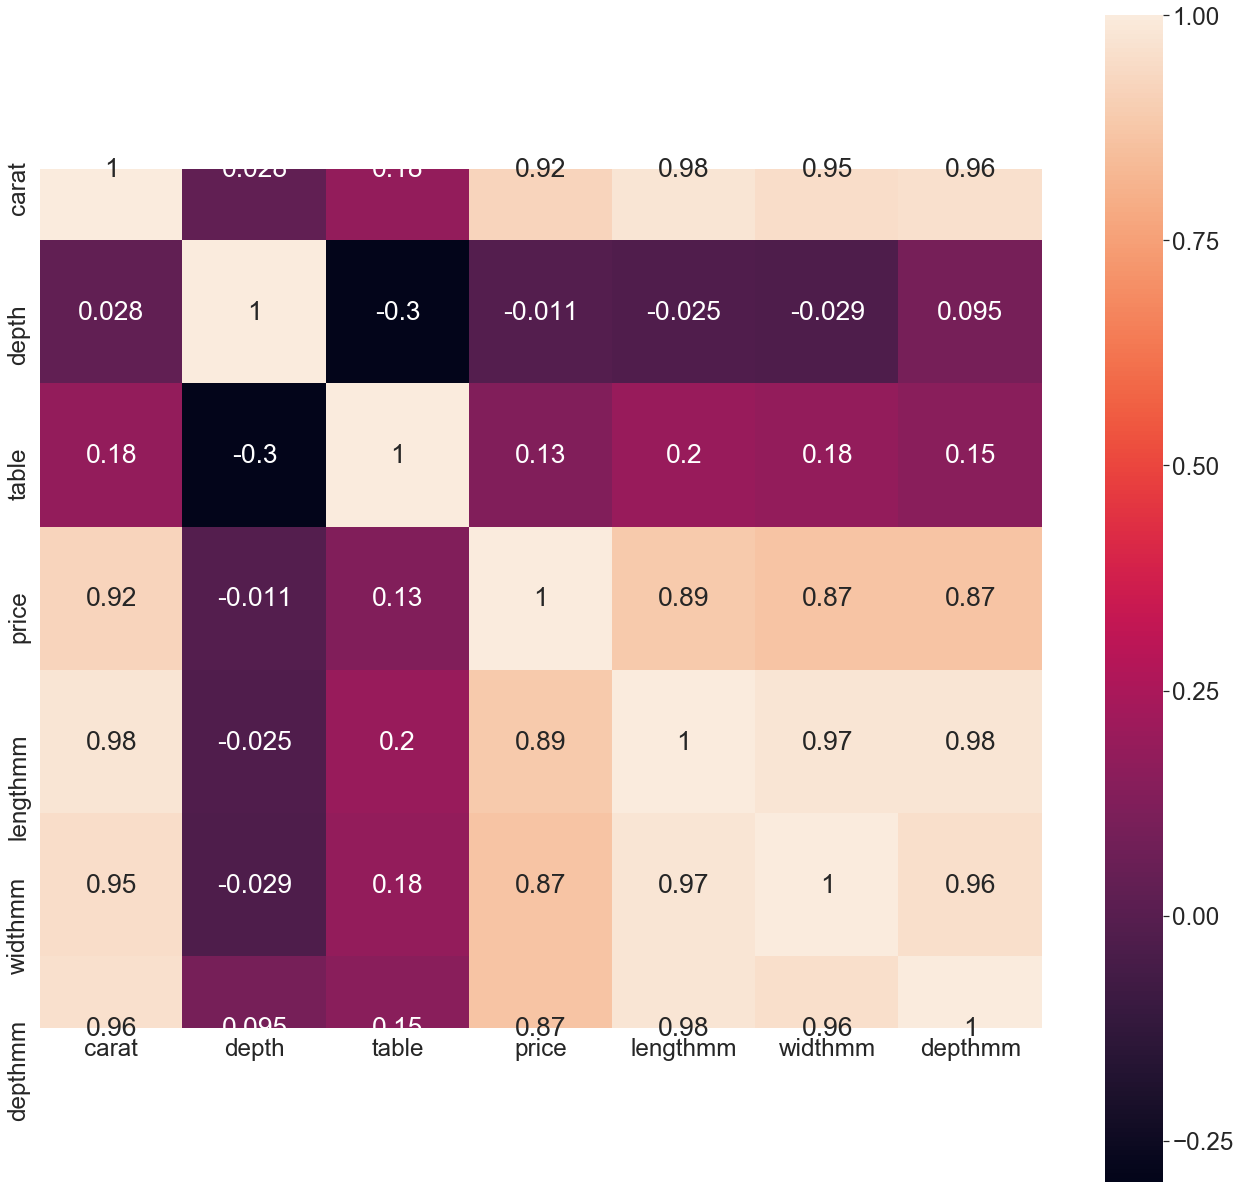

In [392]:
sns.set(font_scale=2.2)
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), square=True,annot=True, cbar=True)

Multicollinearity between
    
    lengthmm x widthmm x depthmm since they are all related to dimension size
    
High correlation between 

    carat x dimension variables (length/width/depth)
    
    carat x price


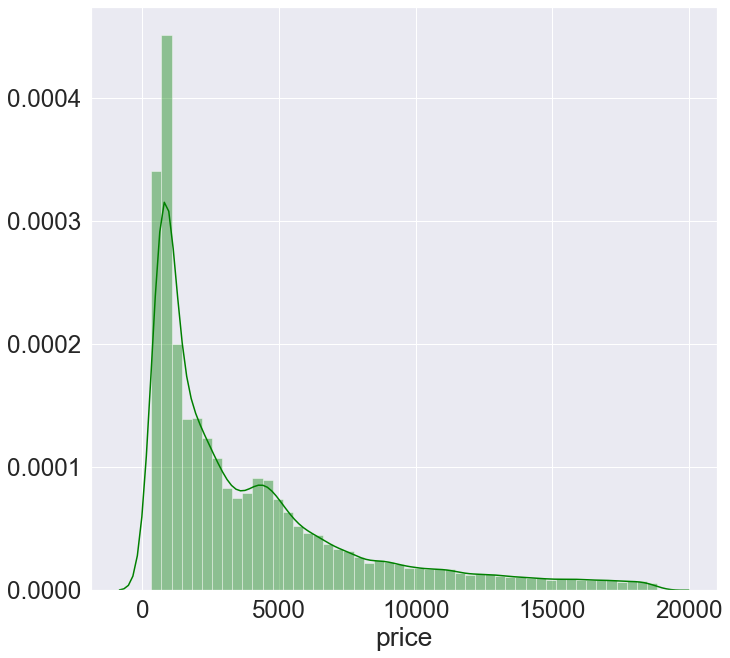

In [393]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'],color='green')
sns.set(font_scale=2.2)


Right skewed, most diamond prices are less than 5000

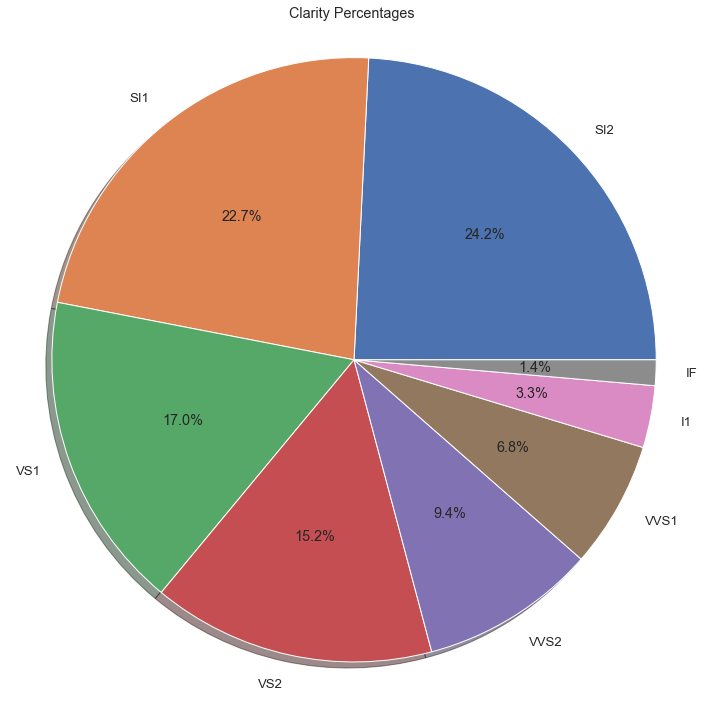

In [413]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,10))
cat=df['clarity'].unique().tolist()
catcount=df['clarity'].value_counts().tolist()
plt.pie(catcount, labels=cat,shadow=True, autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.title('Clarity Percentages')
plt.tight_layout()
plt.show()

# CLUSTERING

Data does not have good clustering characteristics. This is done to practice method and analysis

In [395]:
dfcluster=df

In [396]:
dfcluster['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [397]:
dfcluster['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

Manually encoding features for clustering purpose

In [398]:
dfcluster['cut'] = dfcluster['cut'].replace({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
dfcluster['color']=dfcluster['color'].replace({'E':5,'I':4,'J':3,'H':2,'F':1,'G':0,'D':6})

In [399]:
x=dfcluster.loc[:,['price','depth','carat','cut','color']].values

In [400]:
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(x)
    inertia.append(km.inertia_)

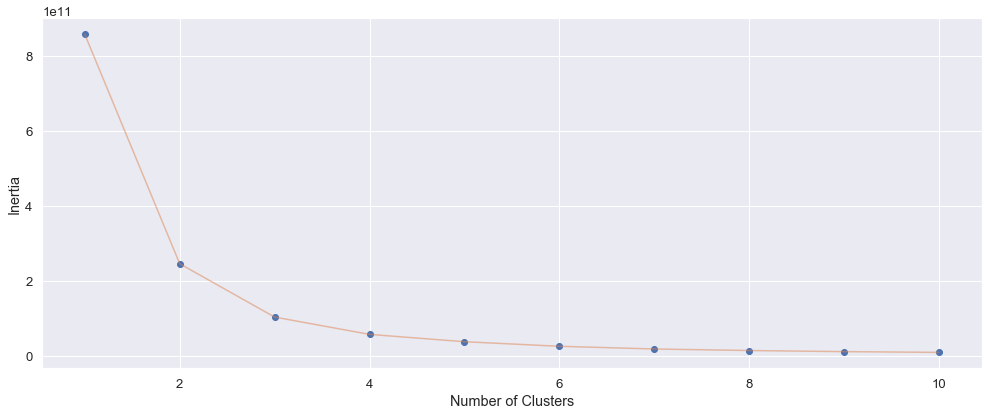

In [401]:
plt.figure(figsize = (15 ,6))
sns.set(font_scale=1.2)
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Selecting number of clusters based on elbow point. After 4 clusters, change stays stagnant.

In [402]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

In [403]:
clusters=pd.concat([dfcluster.loc[:,['price','depth','carat','cut','color']], 
                    pd.DataFrame({'cluster':y_kmeans})], axis=1)
clusters.head()

,price,depth,carat,cut,color,cluster
0,NaN,NaN,NaN,NaN,NaN,0.0
1,326.0,61.5,0.23,5.0,5.0,0.0
2,326.0,59.8,0.21,4.0,5.0,0.0
3,327.0,56.9,0.23,2.0,5.0,0.0
4,334.0,62.4,0.29,4.0,4.0,0.0


Visualizing and analyzing difference between clusters

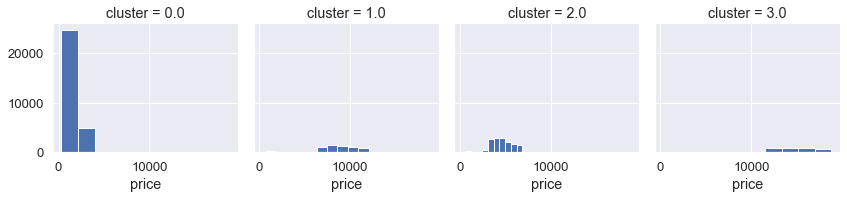

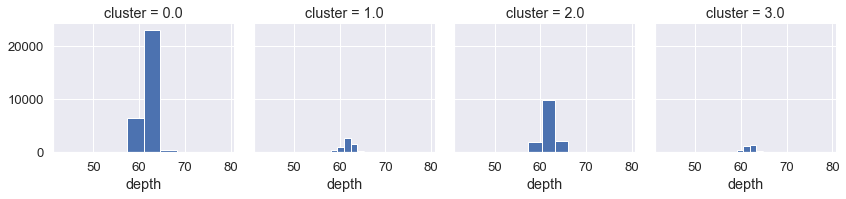

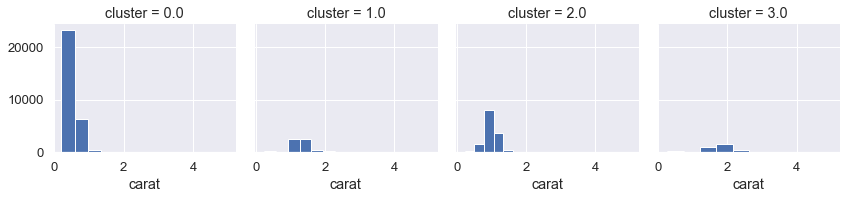

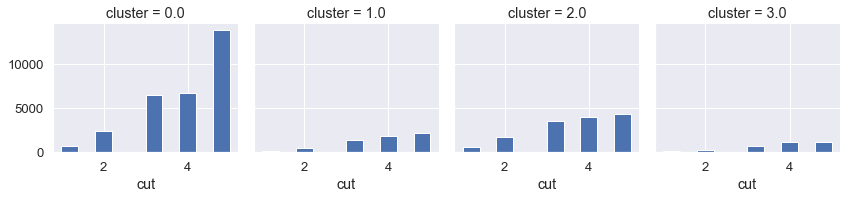

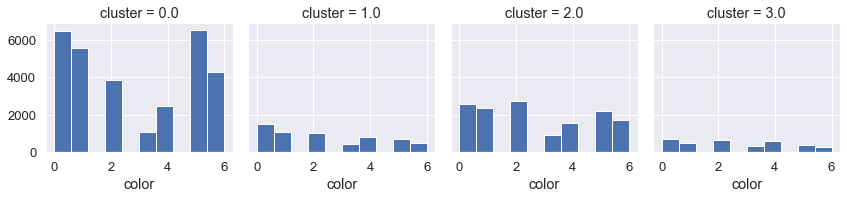

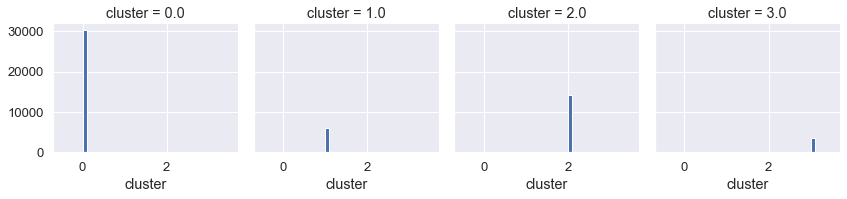

In [404]:
sns.set(font_scale=1.2)
for c in clusters:
    ax= sns.FacetGrid(clusters, col='cluster')
    ax.map(plt.hist, c)

Takeaways 

    - color, no significance in clustering
    - cut no significance in clustering, all cluster have various cut
    - cluster 0 : 0-1 carats
    - cluster 1 : 1-2 carats
    - cluster 2 : 1-2 carats
    - cluster 3 : 1-3 carats

Text(0.5, 1.0, 'Cluster Count')

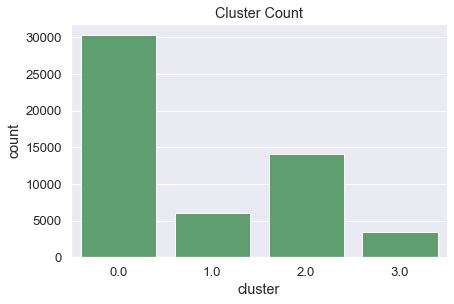

In [405]:
sns.set(font_scale=1.2)
sns.countplot(x='cluster',data=clusters,color='g')
plt.title('Cluster Count')

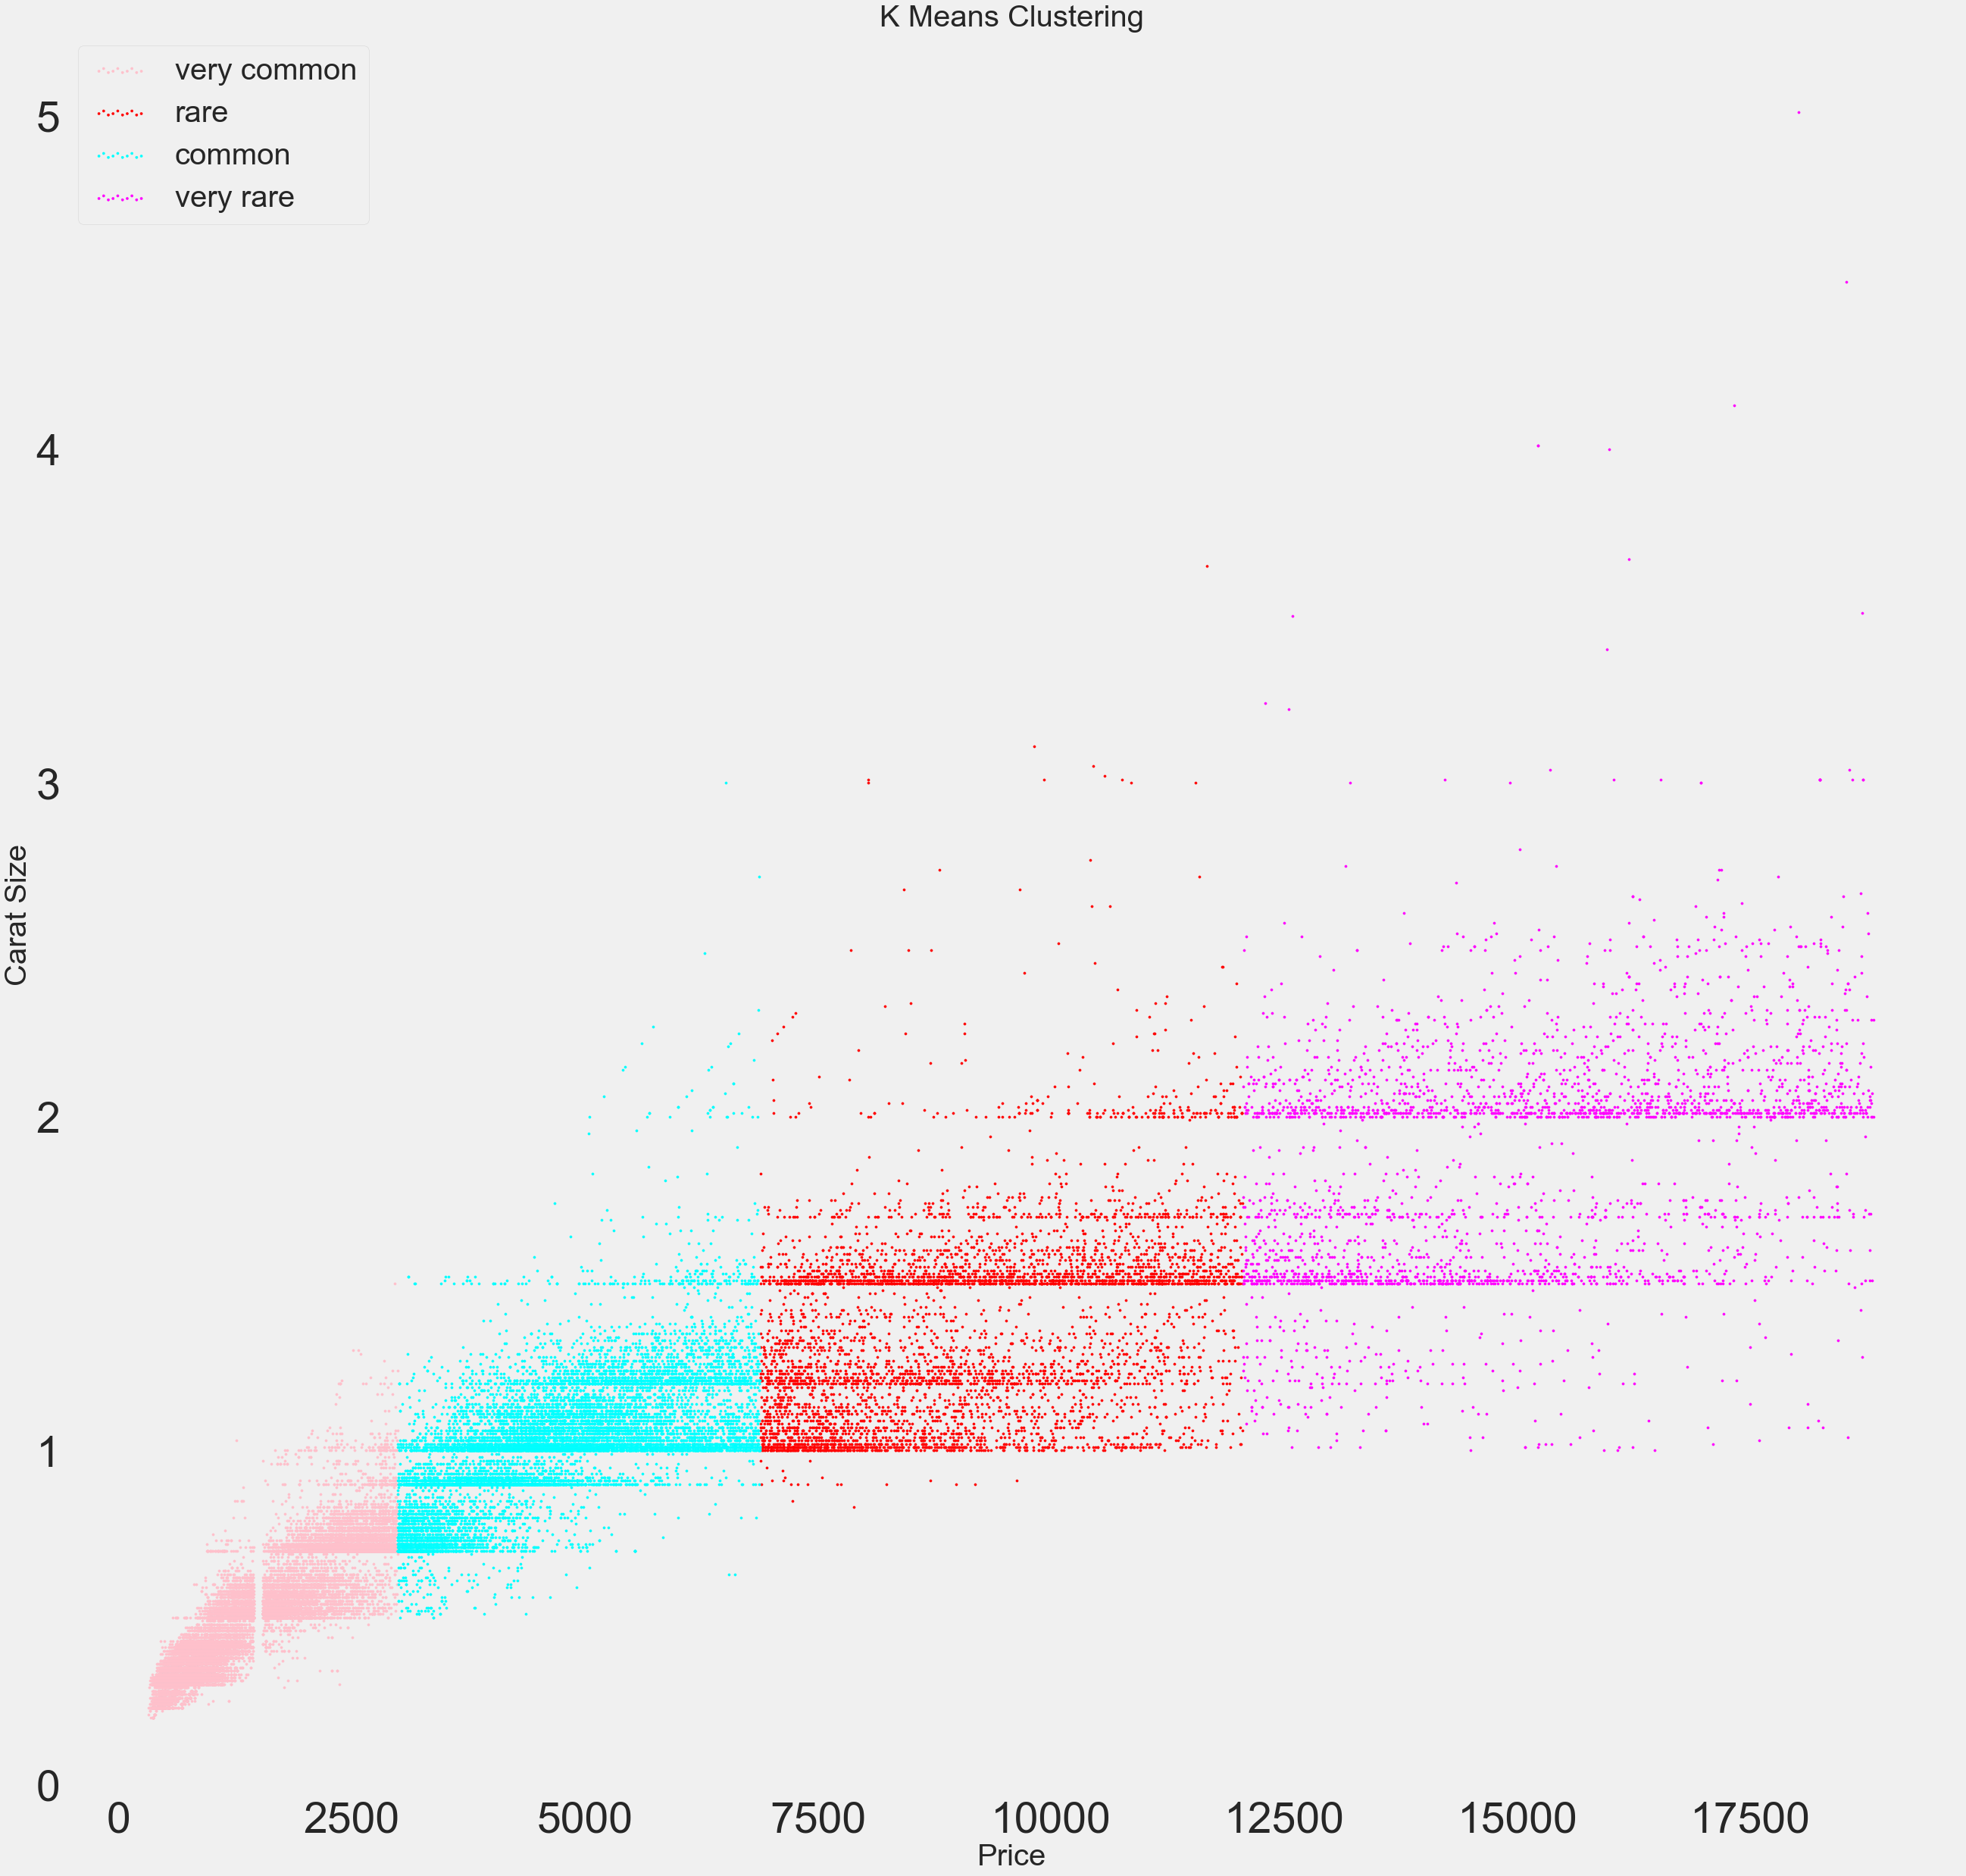

In [408]:
plt.figure(figsize=(40, 40))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], s = 10, c = 'pink', label = 'very common')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], s = 10, c = 'red', label = 'rare')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 10, c = 'cyan', label = 'common')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 2], s = 10, c = 'magenta', label = 'very rare')
sns.set(font_scale=5.2)
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 40)
plt.xlabel('Price',fontsize = 40)
plt.ylabel('Carat Size',fontsize = 40)
plt.legend(scatterpoints=10,fontsize = 40)
plt.grid()
plt.show()

Analysis of Clusters

    From cluster 0 to cluster 3, variation in price and carat size increases. 
    
    Example comparison : cluster 0 at 2500, the carat size varies from 0.5 to 1 
                                      carat size 0-1, price varies from 0-2500
                          
                         cluster 3 at 15000, the carat size varies from 1 to 2.5 
                                      carat size 1-2, price varies from 12500 to 18000
                                      
    
    Variation is effected by cut quality and clarity
                         

# Rescaling and Encoding Features

Preparing dataset for regression modeling, rescaling features does not effect model.

In [350]:
scalingvariable=['carat','depth','table','lengthmm','widthmm','depthmm']
df[scalingvariable]=MinMaxScaler().fit_transform(df[scalingvariable])

In [351]:
df['cut']=LabelEncoder().fit_transform(df['cut'])
df['color']=LabelEncoder().fit_transform(df['color'])
df['clarity']=LabelEncoder().fit_transform(df['clarity'])

# Splitting Data

In [352]:
ydata=df['price']
Xdata=df.drop('price',axis=1)

In [353]:
xtrain,xtest,ytrain,ytest=train_test_split(Xdata,ydata,test_size=0.3,random_state=8)

# RandomForest

In [354]:
rf=RandomForestRegressor()

In [355]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [356]:
rf_ypred=rf.predict(xtest)

In [357]:
def measurements(ytest,ypred):
    x=rf_mse = mean_squared_error(ytest, ypred)
    y=rf_mae = mean_absolute_error(ytest, ypred)
    z=rf_r2=r2_score(ytest,ypred)
    print('MSE:' + str(x))
    print('MAE:' + str(y))
    print('r2:' + str(z))

In [358]:
print(measurements(ytest,rf_ypred))

MSE:366655.1884229042
MAE:300.5096139342236
r2:0.977137022961779
None


# Lasso

In [359]:
la=Lasso(normalize=True)

In [360]:
la.fit(xtrain,ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [361]:
la_ypred=la.predict(xtest)

In [362]:
print(measurements(ytest,la_ypred))

MSE:2281198.5193996895
MAE:931.6086422096337
r2:0.8577546670129133
None


# Ridge

In [363]:
rd=Ridge(normalize=True)
rd.fit(xtrain,ytrain)
rd_ypred=rd.predict(xtest)

In [364]:
print(measurements(ytest,rd_ypred))

MSE:3466899.5532190218
MAE:1187.5539111305986
r2:0.7838196556824886
None


# Linear

In [365]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
lm_ypred=lm.predict(xtest)

In [366]:
print(measurements(ytest,lm_ypred))

MSE:2104359.479866807
MAE:882.0674076291886
r2:0.8687815582937699
None


# KNeighbours

In [367]:
knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
knn_ypred=knn.predict(xtest)

In [368]:
print(measurements(ytest,knn_ypred))

MSE:648462.4717457962
MAE:381.05791295746786
r2:0.9595647816537318
None


# R2 Comparison

In [369]:
all_ypred=[rf_ypred,la_ypred,rd_ypred,lm_ypred,knn_ypred]
algo=['RandomForest Regression','Lasso Regression','Ridge Regression','Linear Regression','KNNeighbours Regression']
all_r2=[]
for x in all_ypred:
    all_r2.append(r2_score(ytest,x))
    
    

In [370]:
regdf=pd.DataFrame({'Algorithms':algo,'R2 Scores':all_r2})

In [371]:
regdf

,Algorithms,R2 Scores
0,RandomForest Regression,0.977137
1,Lasso Regression,0.857755
2,Ridge Regression,0.783820
3,Linear Regression,0.868782
4,KNNeighbours Regression,0.959565


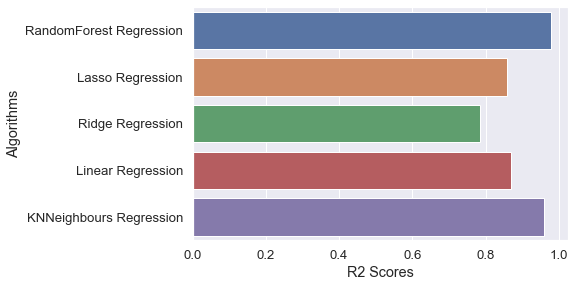

In [372]:
sns.set(font_scale=1.2)
sns.barplot(x='R2 Scores',y='Algorithms',data=regdf)

# Regression Prediction Accuracy and Analysis

Strongest

    -RandomForest

    -KNNeighbours
    
    -Linear
    
    -Lasso
    
    -Ridge

Weakest

    Surprised to see Linear Regression to do so well. Shows that the underlying model is more simple 
    then we thought.